In [112]:
#RandomForest

In [113]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [114]:
train = np.load ('train.npy')
test = np.load ('test.npy')

In [115]:
len(train[0][0])

582

In [116]:
modelo = RandomForestClassifier()

In [130]:
y_prds = list()
y_test2 = list()
media = 0

#Entrenamos el modelo
for i in range(len(train)):
    x_train = pd.DataFrame(train[i])

    y_train = np.array(["carton"]*int(train[i].shape[0]/3) +  ["plastico"]*int(train[i].shape[0]/3) +  ["cristal"]*int(train[i].shape[0]/3))
    modelo.fit(x_train,y_train)
    media = media + (y_train == modelo.predict(x_train)).mean()

In [131]:
print("Precisión del modelo: {0: 0.4f}".format(media/10))

Precisión del modelo:  0.9889


In [132]:
#Testamos el modelo
for i in range(len(train)):
    
    x_test = pd.DataFrame(test[i])
    y_test = np.array(["carton"]*int(test[i].shape[0]/3) +  ["plastico"]*int(test[i].shape[0]/3) +  ["cristal"]*int(test[i].shape[0]/3))
    y_test2 = np.concatenate((y_test2, y_test), axis=0)
    
    y_prds = np.concatenate((y_prds, modelo.predict(x_test)), axis=0)
    score = modelo.score(x_test, y_test)
    print(score)

0.9666666666666667
1.0
1.0
1.0
1.0
1.0
1.0
0.9666666666666667
1.0
0.3


In [133]:
len(y_prds), len(y_test2)


(300, 300)

In [134]:
#Comparamos la lectura real con la predicción
comp = pd.DataFrame({'real' : y_test2, 'preds' : y_prds })
#comp = pd.DataFrame({'real' : y_test, 'p1' : y_prds[0], 'p2' : y_prds[1], 'p3' : y_prds[2], 'p4' : y_prds[3], 'p5' : y_prds[4], 'p6' : y_prds[5], 'p7' : y_prds[6], 'p8' : y_prds[7], 'p9' : y_prds[8], 'p10' : y_prds[9] })
comp

,real,preds
0,carton,carton
1,carton,carton
2,carton,carton
3,carton,carton
4,carton,carton
...,...,...
295,cristal,carton
296,cristal,cristal
297,cristal,cristal
298,cristal,cristal


In [166]:
#Precision de la predicción
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, y_prds)
print("Precisión:", accuracy)

Precisión: 0.9233333333333333


In [167]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools  

In [168]:
cm = confusion_matrix(y_test2, y_prds)
cm #[carton, cristal, plastico]

array([[94,  2,  4],
       [ 5, 93,  2],
       [ 3,  7, 90]], dtype=int64)

In [169]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5,0,1,2,2.5], ["","carton","cristal","plastico"])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizar matriz de confusion")
    else:
        print('Matriz de confusion')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Matriz de confusion
[[94  2  4]
 [ 5 93  2]
 [ 3  7 90]]


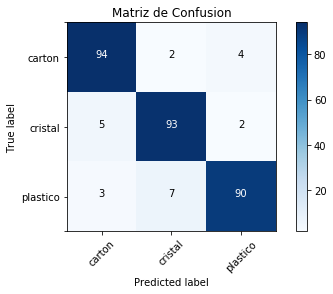

In [170]:
# Plot non-normalized confusion matrix
plt.figure() #num=None, figsize=(8, 6), dpi=80
plot_confusion_matrix(cm, classes= ["carton","cristal","plastico"], title='Matriz de Confusion')

In [171]:
from sklearn.externals import joblib 

In [172]:
joblib.dump(modelo, 'modeloRandomForest.pkl')

['modeloRandomForest.pkl']

In [173]:
modelo.predict(test[5])

array(['carton', 'carton', 'carton', 'carton', 'carton', 'carton',
       'carton', 'carton', 'carton', 'carton', 'plastico', 'plastico',
       'plastico', 'plastico', 'plastico', 'plastico', 'plastico',
       'plastico', 'plastico', 'plastico', 'cristal', 'cristal',
       'cristal', 'cristal', 'cristal', 'cristal', 'cristal', 'cristal',
       'cristal', 'cristal'], dtype='<U8')

In [174]:
modelo.predict([test[5][6],test[7][20],test[1][12]])

array(['carton', 'cristal', 'plastico'], dtype='<U8')